In [2]:
import pandas as pd
import os   
import matplotlib.pyplot as plt            
import random    
import numpy as np
import re                                
import string
import nltk                                      
from nltk.stem import PorterStemmer        
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from imblearn.over_sampling import SMOTE

In [3]:
#Read extracted conted from email text files for six classes
data1 = pd.read_csv('email_content_class1.csv')#, index_col=False)  
data2 = pd.read_csv('email_content_class2.csv')
data3 = pd.read_csv('email_content_class3.csv')
data4 = pd.read_csv('email_content_class4.csv')
data5 = pd.read_csv('email_content_class5.csv')
data6 = pd.read_csv('email_content_class6.csv')

In [4]:
df = pd.concat([data1,data2,data3,data4,data5,data6],ignore_index=True)
df.head(5)

,Content,Labels
0,Forwarded by Steven J KeanHOUEES on 101899 08...,0
1,In anticipation of potential litigation involv...,0
2,Julia and Stevehere are some questions Ive sen...,0
3,Julia and Stevehere are some questions Ive sen...,0
4,In anticipation of potential litigation involv...,0


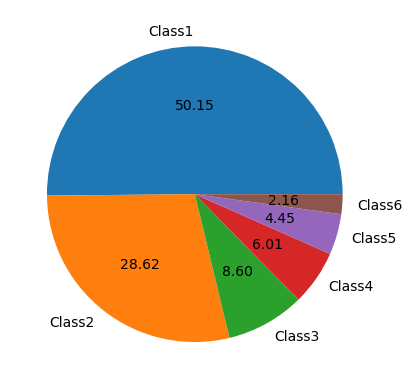

In [5]:
#Check imbalance in dataset
plt.pie(df['Labels'].value_counts(), labels=['Class1','Class2','Class3','Class4','Class5','Class6'],autopct="%0.2f")
plt.show()

In [6]:
# df['num_words'] = df['Content'].apply(lambda x:len(nltk.word_tokenize(x)))
# plt.hist(df['num_words'], bins=5)
# plt.ylabel('Number of samples')
# plt.xlabel('Number of words')
# plt.show()

In [7]:
#Data preprocessing

def transform_text(text):
    #lowercase
    text = text.lower()
    
    #tokenize words
    text = nltk.word_tokenize(text)
        
    y = []
    
    #if either alphabets or numbers
    for i in text:
        if i.isalnum():
            y.append(i)
    
    ps = PorterStemmer()
    text = y[:]
    y.clear()
    
    #stem the words  
    for i in text:
        y.append(ps.stem(i))
    
    #convert to string
    y = " ".join(y)
    
    #remove digits
    y = re.sub(r'\d+', '', y)
    
    return y

In [8]:
temp = df['Content']
temp[1]

'In anticipation of potential litigation involving TWs operational activities please prepare an analysis for me of the reasons for TWs sale of excess natural gas at the California border  I am aware of several of these sales and have been  informed that excess pressure at the border is the basic reason for them  Id like a more specific explanation that includes the following information1  What are the specific pressures and volume considerations that could make it operationally necessary to sell gas at the California border  2  What is the process that is followed to make such a determination3  Which individuals or groups are involved in determining whether an operational sale is necessary4  In what way have system operations changed since last year and how do those changes contribute to the increased frequency of such sales compared to previous years5 What alternatives to operational sales are considered before the decision to make a sale is reached Thanks for your attention to this r

In [9]:
transform_text(temp[1])

'in anticip of potenti litig involv tw oper activ pleas prepar an analysi for me of the reason for tw sale of excess natur ga at the california border i am awar of sever of these sale and have been inform that excess pressur at the border is the basic reason for them id like a more specif explan that includ the follow information what are the specif pressur and volum consider that could make it oper necessari to sell ga at the california border  what is the process that is follow to make such a determination which individu or group are involv in determin whether an oper sale is necessary in what way have system oper chang sinc last year and how do those chang contribut to the increas frequenc of such sale compar to previou years what altern to oper sale are consid befor the decis to make a sale is reach thank for your attent to thi request pleas give me a call to discuss and pleas design your respons as privileg and confidenti attorney client privileg'

In [10]:
#Preprocessing all the contet:
df['transformed_text'] = df['Content'].apply(transform_text)
df.head(5)

,Content,Labels,transformed_text
0,Forwarded by Steven J KeanHOUEES on 101899 08...,0,forward by steven j keanhoue on am karen den...
1,In anticipation of potential litigation involv...,0,in anticip of potenti litig involv tw oper act...
2,Julia and Stevehere are some questions Ive sen...,0,julia and steveher are some question ive sent ...
3,Julia and Stevehere are some questions Ive sen...,0,julia and steveher are some question ive sent ...
4,In anticipation of potential litigation involv...,0,in anticip of potenti litig involv tw oper act...


In [11]:
#Two vectorizers 
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [12]:
#Computing vectors using each vectorizer
Xc = cv.fit_transform(df['transformed_text']).toarray()
Xt = tfidf.fit_transform(df['transformed_text']).toarray()

In [14]:
models = [LogisticRegression(solver='liblinear', penalty='l1'), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), 
          RandomForestClassifier(n_estimators=50, random_state=2), LinearSVC(), MLPClassifier(hidden_layer_sizes=(50,))]

names = ['Logistic Regressor','Gaussian naive Bayes','KNN','Decision tree','Random forest','SVM-Linear','ANN']

In [15]:
from sklearn.model_selection import cross_validate

for model, name in zip(models, names):
    print(name)
    
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
    }
    scores = cross_validate(model, Xc, df['Labels'], cv=10, n_jobs=4, scoring=scoring)
    # training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("\n")
    

Logistic Regressor
accuracy:  0.626491595123007
f1_score:  0.4208301224199042


Gaussian naive Bayes
accuracy:  0.47203304234903687
f1_score:  0.2515408390686304


KNN
accuracy:  0.5177945314190895
f1_score:  0.25648928152902895


Decision tree
accuracy:  0.5056850155111464
f1_score:  0.3138121583090297


Random forest
accuracy:  0.6114674265925981
f1_score:  0.3184469413809008


SVM-Linear
accuracy:  0.5777757737536974
f1_score:  0.40451691330063866


ANN
accuracy:  0.6469374504004041
f1_score:  0.4342783173206966




In [21]:
from sklearn.model_selection import cross_validate

for model, name in zip(models, names):
    print(name)
    
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
    }
    scores = cross_validate(model, Xt, df['Labels'], cv=10, n_jobs=4, scoring=scoring)
    # training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("\n")
    

Logistic Regressor
accuracy:  0.6601940696919415
f1_score:  0.3549501988212769


Gaussian naive Bayes
accuracy:  0.5129391818772093
f1_score:  0.25684669476304894


KNN
accuracy:  0.27233965803333093
f1_score:  0.16013577086441086


Decision tree
accuracy:  0.49425366135199483
f1_score:  0.2926511155650747


Random forest
accuracy:  0.6229132097251281
f1_score:  0.3277793664703553


SVM-Linear
accuracy:  0.6614385686458408
f1_score:  0.43721226649832257


ANN
accuracy:  0.6235733352571964
f1_score:  0.42916722614404124




In [16]:
oversample = SMOTE()
X, y = oversample.fit_resample(Xt, df['Labels'])

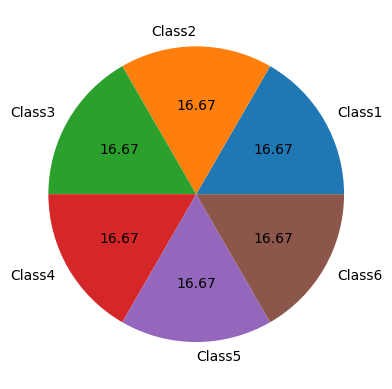

In [17]:
plt.pie(y.value_counts(), labels=['Class1','Class2','Class3','Class4','Class5','Class6'],autopct="%0.2f")
plt.show()

In [18]:
print('Number of samples after SMOTE : ' ,X.shape[0])

Number of samples after SMOTE :  5004


In [19]:

for model, name in zip(models, names):
    print(name)
    
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
    }
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    # training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("\n")
    

Logistic Regressor
accuracy:  0.8279493013972056
f1_score:  0.823238063311638


Gaussian naive Bayes
accuracy:  0.8459321357285429
f1_score:  0.8363530506891695


KNN
accuracy:  0.7789744510978045
f1_score:  0.7445724262891767


Decision tree
accuracy:  0.83335249500998
f1_score:  0.8290984047194911


Random forest
accuracy:  0.907692614770459
f1_score:  0.9062940005805912


SVM-Linear
accuracy:  0.8930850299401198
f1_score:  0.8883754006365564


ANN
accuracy:  0.9218714570858282
f1_score:  0.918507361783471


